<a href="https://colab.research.google.com/github/Vanshaj-cs/Machine-Learning/blob/main/Building_Linear_Regression_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Building Linear Regression

In [ ]:
import numpy as np

In [ ]:
class Linear_Regression():

  def __init__(self, learning_rate, no_of_iterations):

    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations


  def fit(self, X, Y ):

    self.m, self.n = X.shape

    self.w = np.zeros(self.n)
    self.b = 0
    self.X = X
    self.Y = Y

    for i in range(self.no_of_iterations):
      self.update_weights()


  def update_weights(self):

    Y_prediction = self.predict(self.X)

    dw = - (2 * (self.X.T).dot(self.Y - Y_prediction)) / self.m
    db = - 2 * np.sum(self.Y - Y_prediction)/self.m

    self.w = self.w - self.learning_rate*dw
    self.b = self.b - self.learning_rate*db


  def predict(self, X):

    return X.dot(self.w) + self.b

Implementing

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [9]:
salary = pd.read_csv('salary_data.csv')

In [10]:
salary.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [11]:
salary.shape

(30, 2)

In [12]:
X = salary.iloc[:, :-1].values
Y = salary.iloc[:, -1].values

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [15]:
LR = Linear_Regression(learning_rate = 0.02, no_of_iterations = 1000)
LR.fit(X_train, Y_train)

In [16]:
print('weight = ', LR.w[0])
print('bias = ', LR.b)

weight =  9570.888860991548
bias =  24384.029598697263


In [17]:
test_data_pred = LR.predict(X_test)

In [18]:
print(test_data_pred)

[36826.18511799 34912.00734579 67453.02947316 59796.31838437
 92337.34051174 81809.36276465]


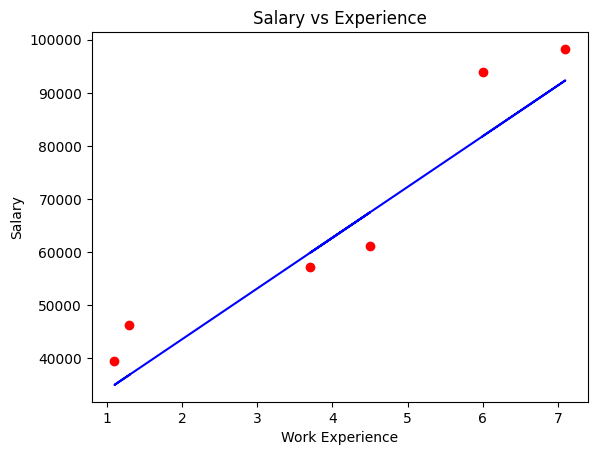

In [20]:
plt.scatter( X_test, Y_test, color = 'red' )
plt.plot( X_test, test_data_pred, color = 'blue' )
plt.xlabel( 'Work Experience' )
plt.ylabel( 'Salary' )
plt.title( 'Salary vs Experience' )
plt.show()